  0%|          | 0/27 [00:00<?, ?it/s]

CALB_25_T25-2.pkl
[0, 1]
58 60.17728


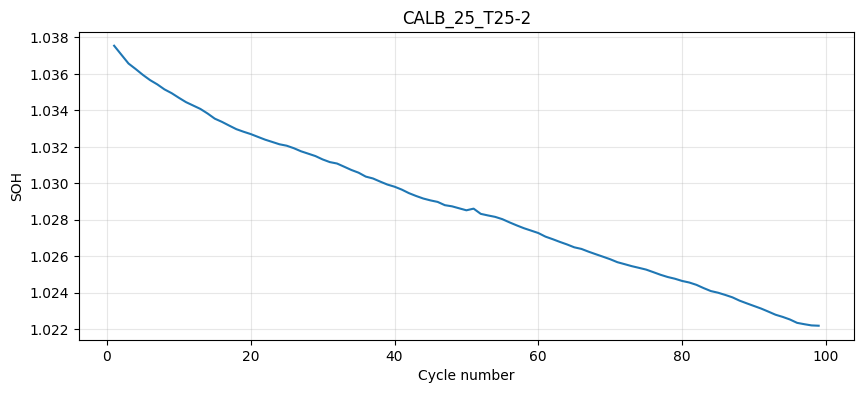

  4%|▎         | 1/27 [00:00<00:06,  3.78it/s]

CALB_35_B173.pkl
[0, 1]
58 59.37707


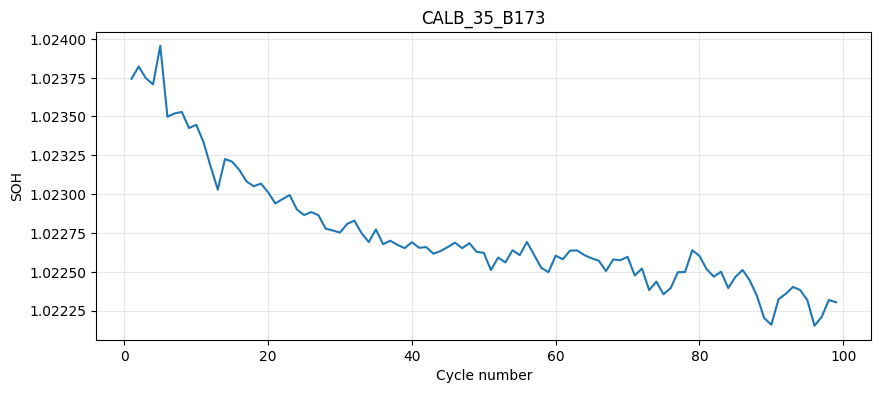

  7%|▋         | 2/27 [00:00<00:06,  3.92it/s]

CALB_45_B253.pkl
[0, 1]
58 59.25583


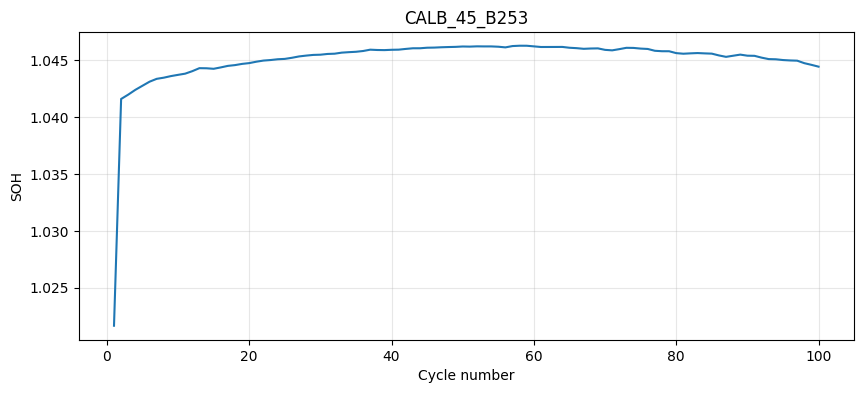

 11%|█         | 3/27 [00:00<00:05,  4.08it/s]

CALB_25_T25-1.pkl
[0, 1]
58 60.41077


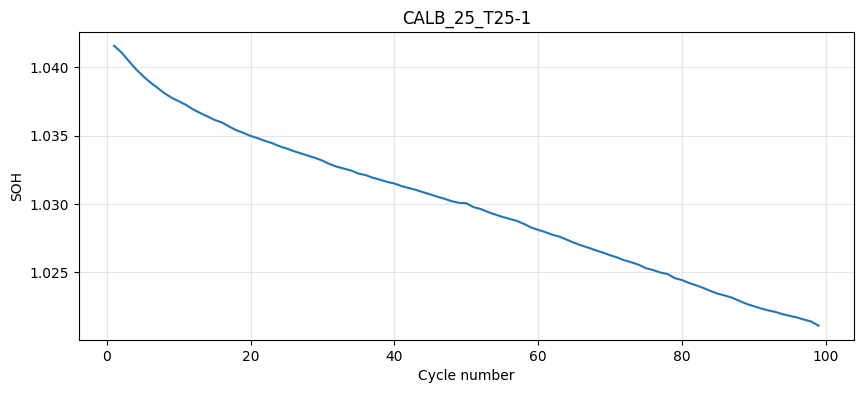

 15%|█▍        | 4/27 [00:00<00:05,  4.21it/s]

CALB_0_B188.pkl
[0, 1]
58 50.11591


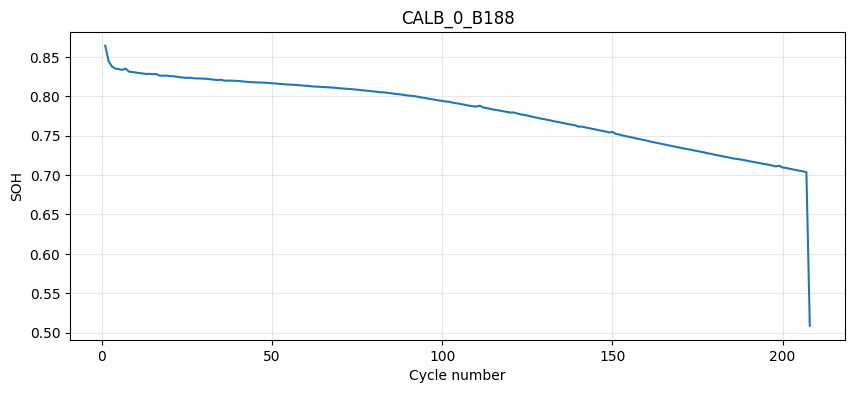

 19%|█▊        | 5/27 [00:01<00:06,  3.46it/s]

CALB_0_B189.pkl
[0, 1]
58 50.56625


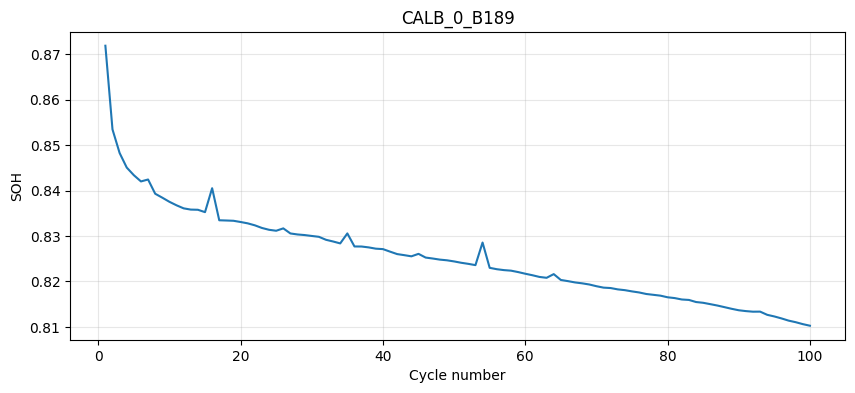

 22%|██▏       | 6/27 [00:01<00:05,  3.65it/s]

CALB_35_B247.pkl
[0, 1]
58 58.09073


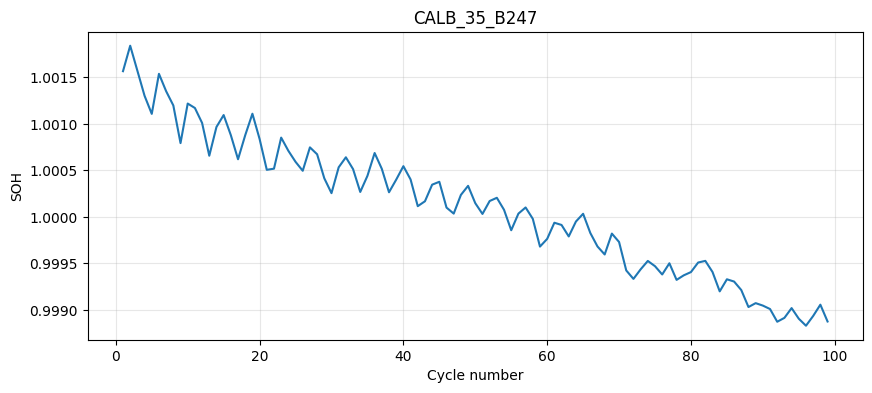

 26%|██▌       | 7/27 [00:01<00:05,  3.81it/s]

CALB_0_B184.pkl
[0, 1]
58 50.63432


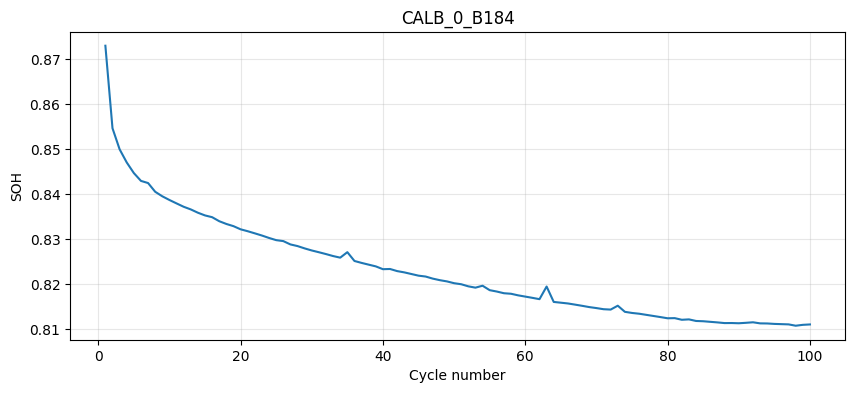

 30%|██▉       | 8/27 [00:02<00:04,  3.96it/s]

CALB_35_B224.pkl
[0, 1]
58 59.49447


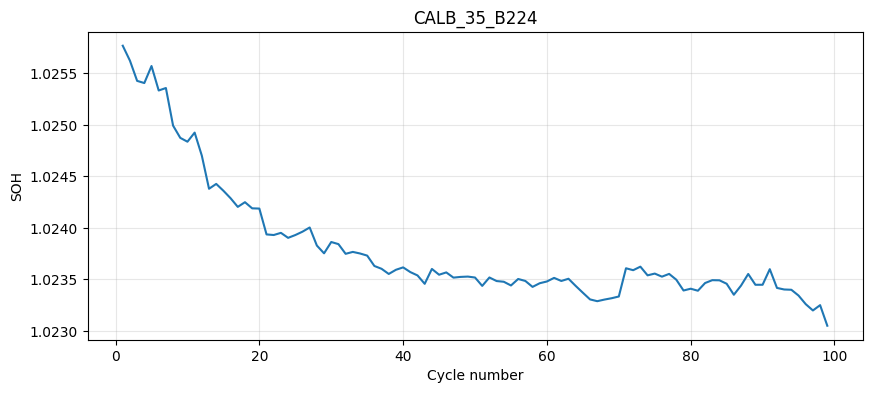

 33%|███▎      | 9/27 [00:02<00:04,  4.07it/s]

CALB_35_B229.pkl
[0, 1]
58 59.35708


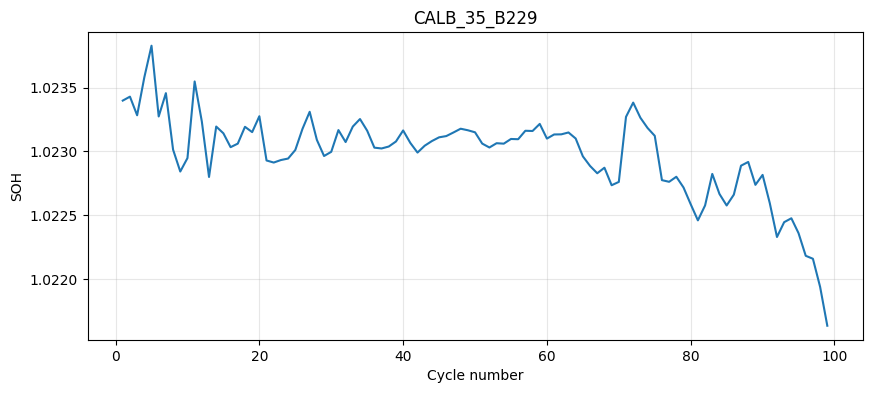

 37%|███▋      | 10/27 [00:02<00:04,  3.78it/s]

CALB_35_B230.pkl
[0, 1]
58 59.03297


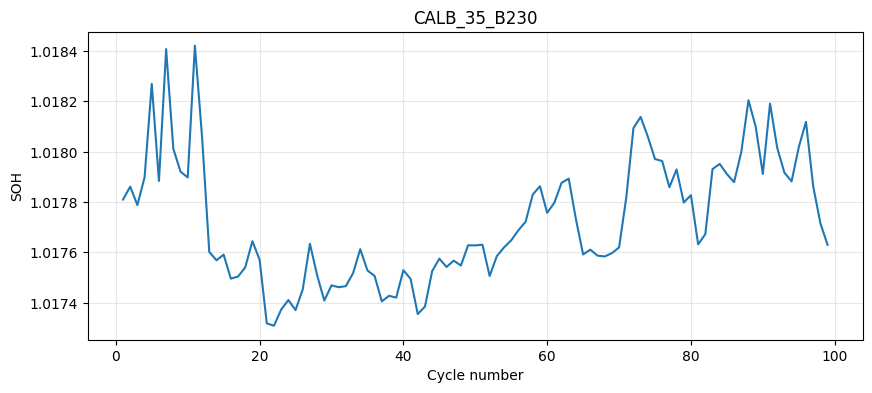

 41%|████      | 11/27 [00:02<00:04,  3.94it/s]

CALB_45_B255.pkl
[0, 1]
58 59.17059


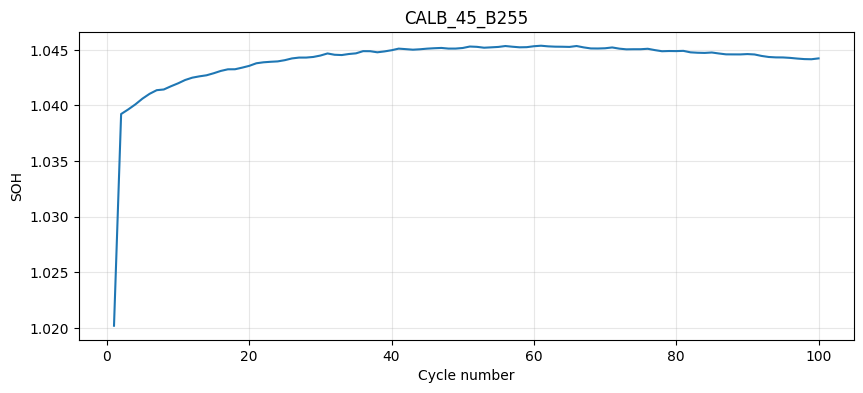

 44%|████▍     | 12/27 [00:03<00:03,  4.06it/s]

CALB_35_B249.pkl
[0, 1]
58 58.81946


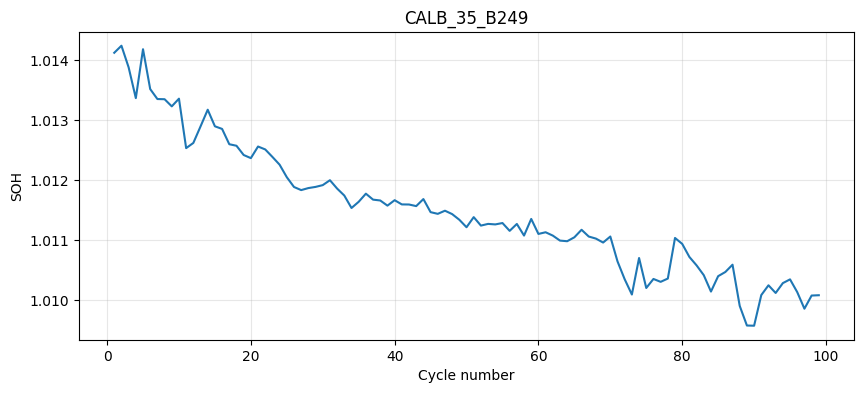

 48%|████▊     | 13/27 [00:03<00:03,  4.15it/s]

CALB_35_B250.pkl
[0, 1]
58 59.72155


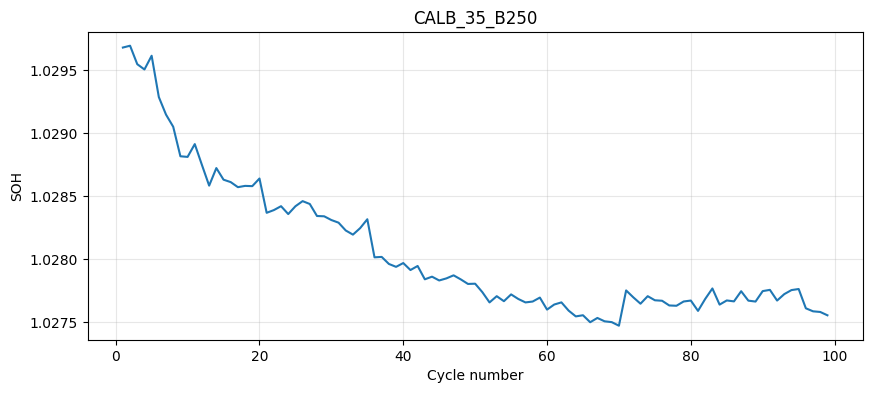

 52%|█████▏    | 14/27 [00:03<00:03,  4.23it/s]

CALB_35_B228.pkl
[0, 1]
58 59.10791


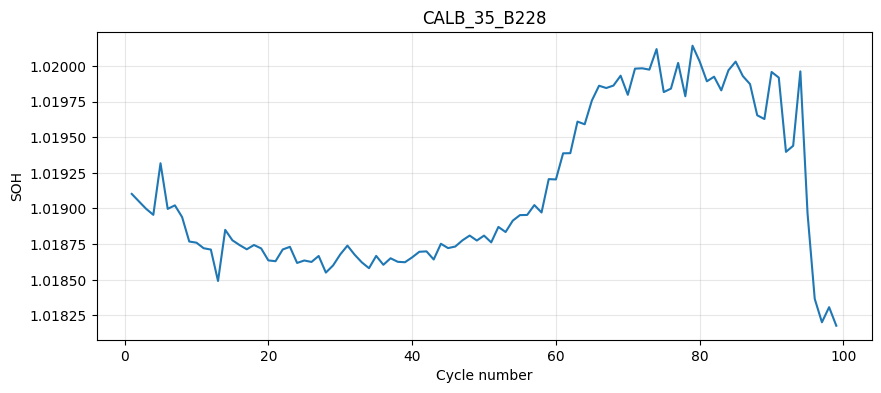

 56%|█████▌    | 15/27 [00:03<00:02,  4.23it/s]

CALB_45_B256.pkl
[0, 1]
58 60.39165


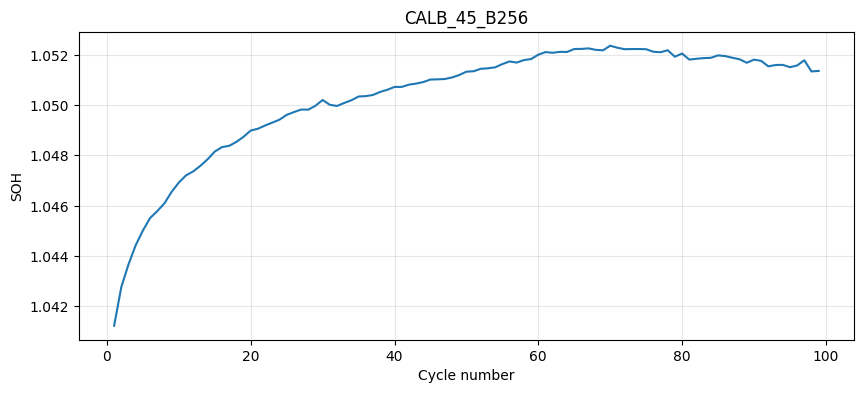

 59%|█████▉    | 16/27 [00:03<00:02,  4.27it/s]

CALB_0_B182.pkl
[0, 1]
58 49.69816


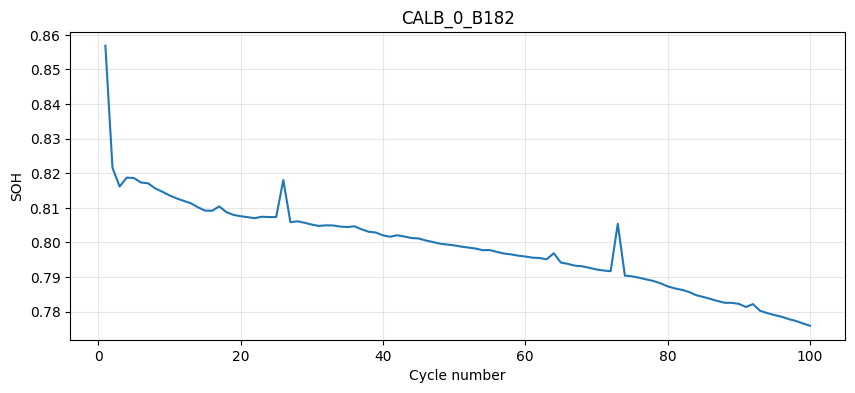

 63%|██████▎   | 17/27 [00:04<00:02,  4.26it/s]

CALB_35_B248.pkl
[0, 1]
58 59.10292


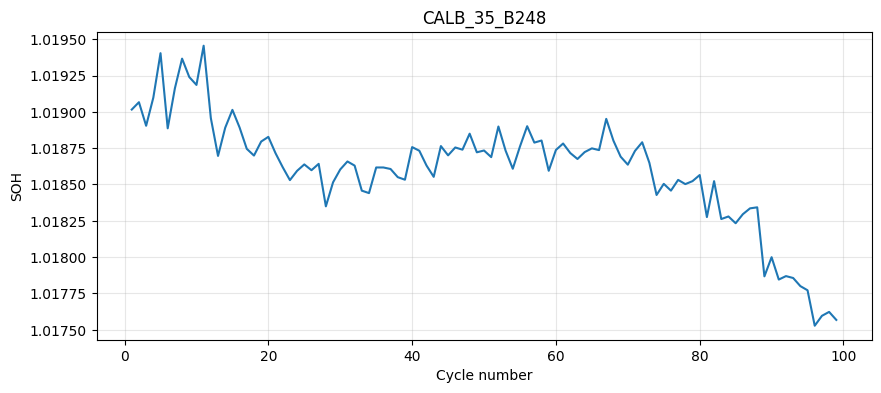

 67%|██████▋   | 18/27 [00:04<00:02,  4.23it/s]

CALB_35_B175.pkl
[0, 1]
58 59.01923


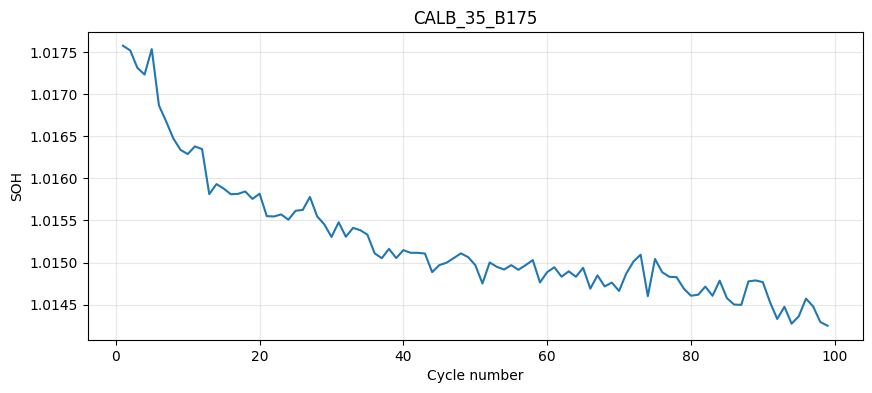

 70%|███████   | 19/27 [00:04<00:01,  4.25it/s]

CALB_0_B187.pkl
[0, 1]
58 50.51223


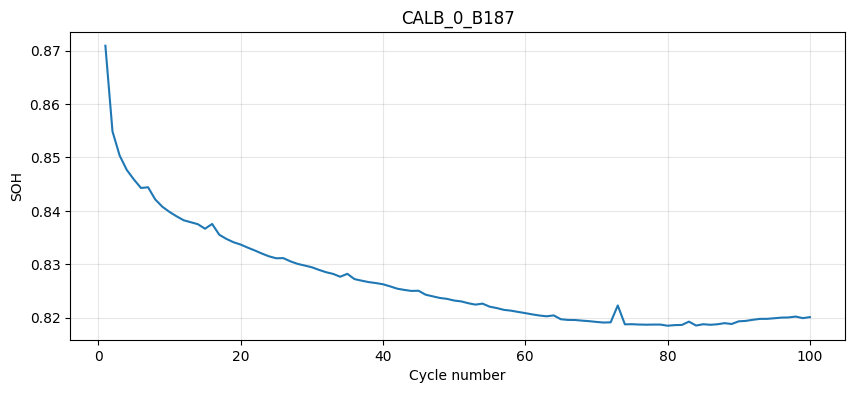

 74%|███████▍  | 20/27 [00:04<00:01,  4.31it/s]

CALB_35_B227.pkl
[0, 1]
58 59.03642


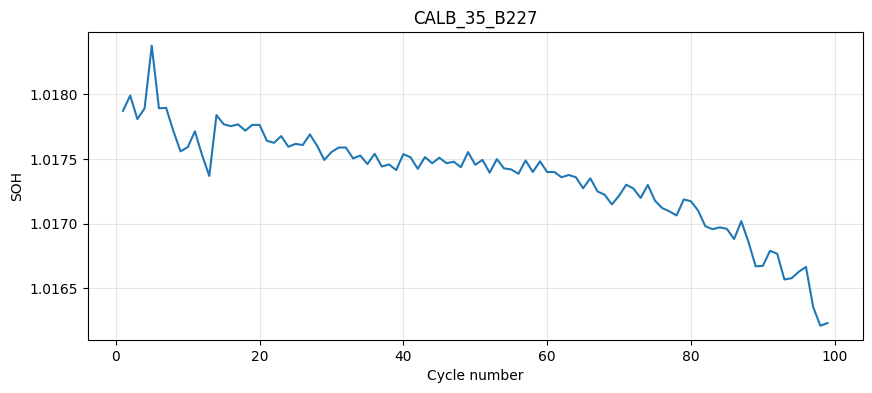

 78%|███████▊  | 21/27 [00:05<00:01,  4.33it/s]

CALB_35_B222.pkl
[0, 1]
58 59.10328


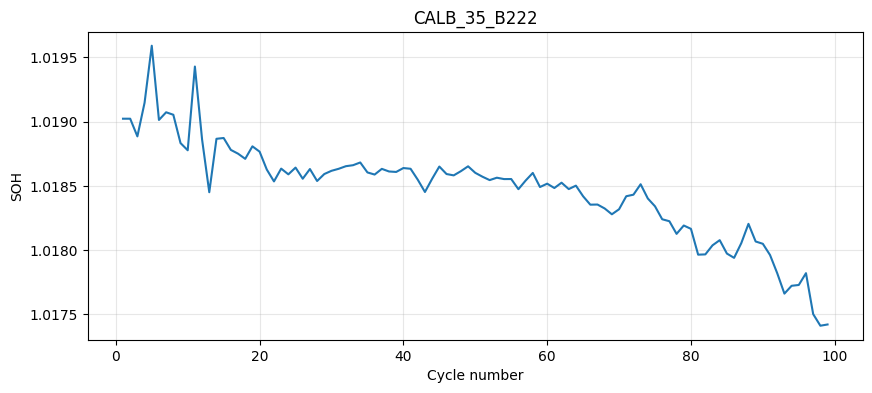

 81%|████████▏ | 22/27 [00:05<00:01,  4.36it/s]

CALB_35_B174.pkl
[0, 1]
58 58.97648


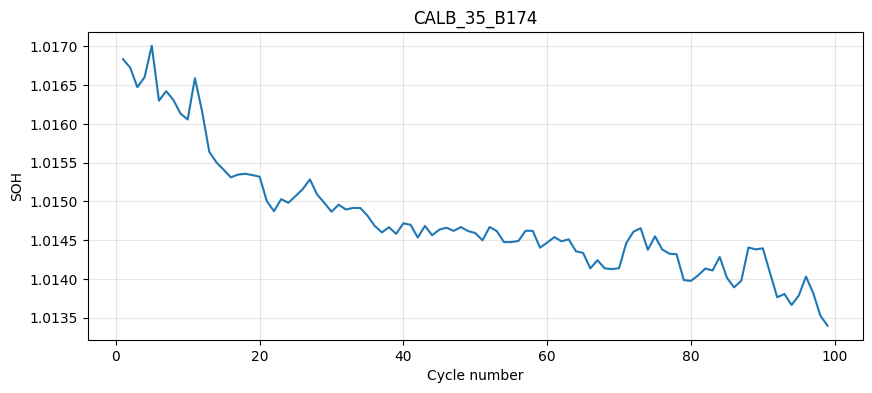

 85%|████████▌ | 23/27 [00:05<00:00,  4.32it/s]

CALB_0_B190.pkl
[0, 1]
58 50.22162


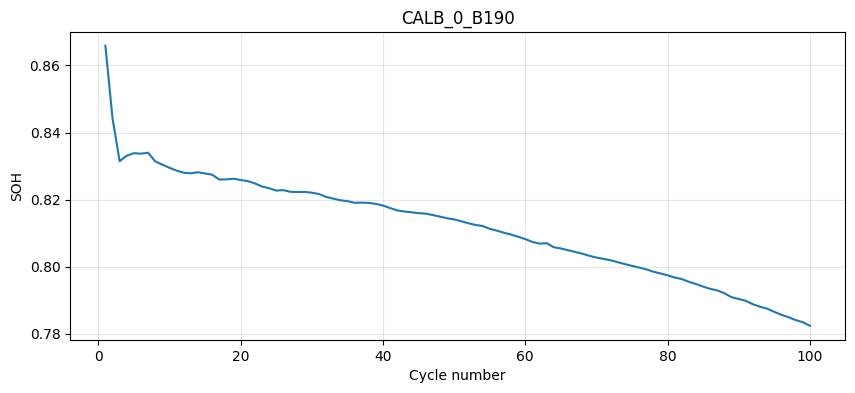

 89%|████████▉ | 24/27 [00:05<00:00,  3.87it/s]

CALB_35_B223.pkl
[0, 1]
58 58.73618


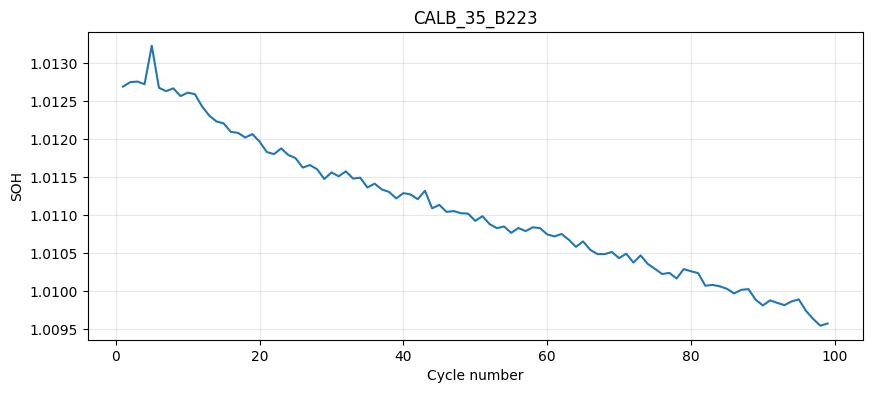

 93%|█████████▎| 25/27 [00:06<00:00,  3.99it/s]

CALB_0_B183.pkl
[0, 1]
58 50.3262


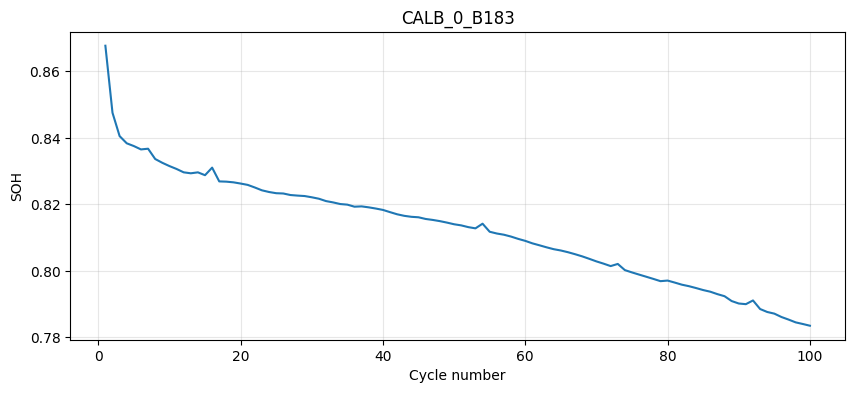

 96%|█████████▋| 26/27 [00:06<00:00,  4.12it/s]

CALB_0_B185.pkl
[0, 1]
58 50.50464


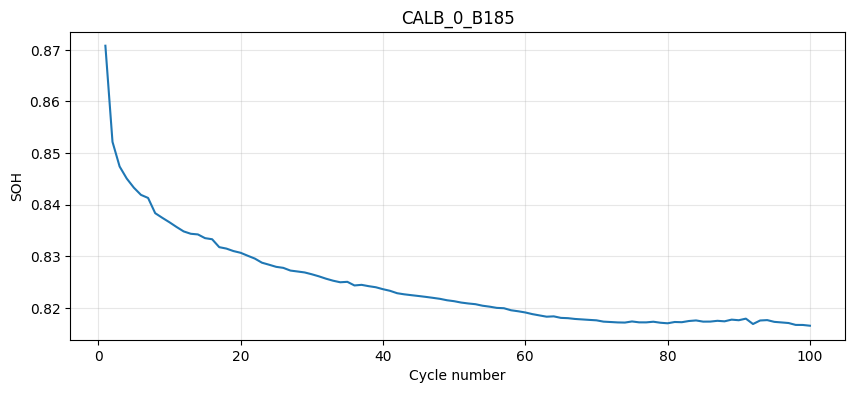

100%|██████████| 27/27 [00:06<00:00,  4.08it/s]


In [ ]:
import os
import pickle
import pandas as pd
from openpyxl.styles.builtins import total
from sympy.physics.units import charge
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from scipy.interpolate import PchipInterpolator
from pathlib import Path
from scipy.interpolate import splrep, splev
from scipy import interpolate
import matplotlib.pyplot as plt

from sympy.physics.control.control_plots import matplotlib

path = '/data/trf/python_works/BatteryLife/dataset/CALB/'
ppath = Path(path)
files = os.listdir(path)
files = [i for i in files if i.endswith('.pkl')]
soc = []
cell = []
life_label = []
file_name = []
total_soh = []
total_cycles = []
data = {}
for file in tqdm(files):
    print(file)
    file_name.append(file)
    with open(path + f'{file}', 'rb') as f:
        cell_data = pickle.load(f)
        filename = file.split('.pkl')[0]
        length = len(cell_data['cycle_data'])
        cell = cell_data['cycle_data']
        nominal_capacity = cell_data['nominal_capacity_in_Ah']


        df = pd.DataFrame()
        SOC_interval = cell_data['SOC_interval']  # get the charge and discharge soc interval
        print(SOC_interval)

        SOC_interval = SOC_interval[1] - SOC_interval[0]


        soh = []
        cycles = []
        for i in range(0, length):
            cycle_df = pd.DataFrame()
            cycle_data_len = len(cell_data['cycle_data'][i])
            cycle_data = cell_data['cycle_data'][i]
            cycle_df['current'] = cycle_data['current_in_A']
            cycle_df['voltage'] = cycle_data['voltage_in_V']
            cycle_df['charge_capacity'] = cycle_data['charge_capacity_in_Ah']
            cycle_df['discharge_capacity'] = cycle_data['discharge_capacity_in_Ah']
            cycle_df['test_time_s'] = cycle_data['time_in_s']
            cycle_df['cycle_number'] = cycle_data['cycle_number']
            cycles.append(i+1)

            if file.startswith('CALB_-10'):
                soh_value = abs(cycle_df.loc[cycle_df['current'] < 0, 'discharge_capacity'].min())
            elif 'DefaultGroup' in file:
                soh_value = float(cycle_df['discharge_capacity'].max())
            else:
                soh_value = float(cycle_df.loc[cycle_df['current'] < 0, 'discharge_capacity'].max())


            if SOC_interval == 0:
                SOC_interval = 1

            if i == 0:
                print(nominal_capacity, max(cycle_df['discharge_capacity']))

            soh.append(soh_value/nominal_capacity/SOC_interval)


        fig = plt.figure(figsize=(10, 4))
        plt.xlabel('Cycle number')
        plt.ylabel('SOH')
        plt.grid(alpha=.3)
        plt.plot(cycles, soh)
        plt.title(f'{filename}')
        plt.show()

